In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
df = pd.read_csv('deaths-heart-failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## About Data set

    Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
    Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

    Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

    People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
    
    
    time = Follow-up period (days)
    ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)


In [3]:
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

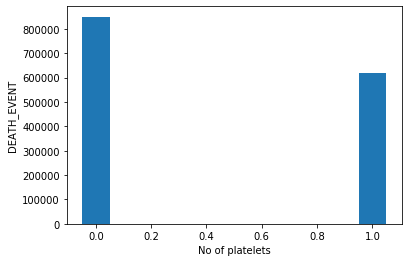

In [5]:
plt.bar(df['DEATH_EVENT'],df['platelets'],width = 0.1)

plt.xlabel("No of platelets")

plt.ylabel("DEATH_EVENT")


plt.show()

In [6]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


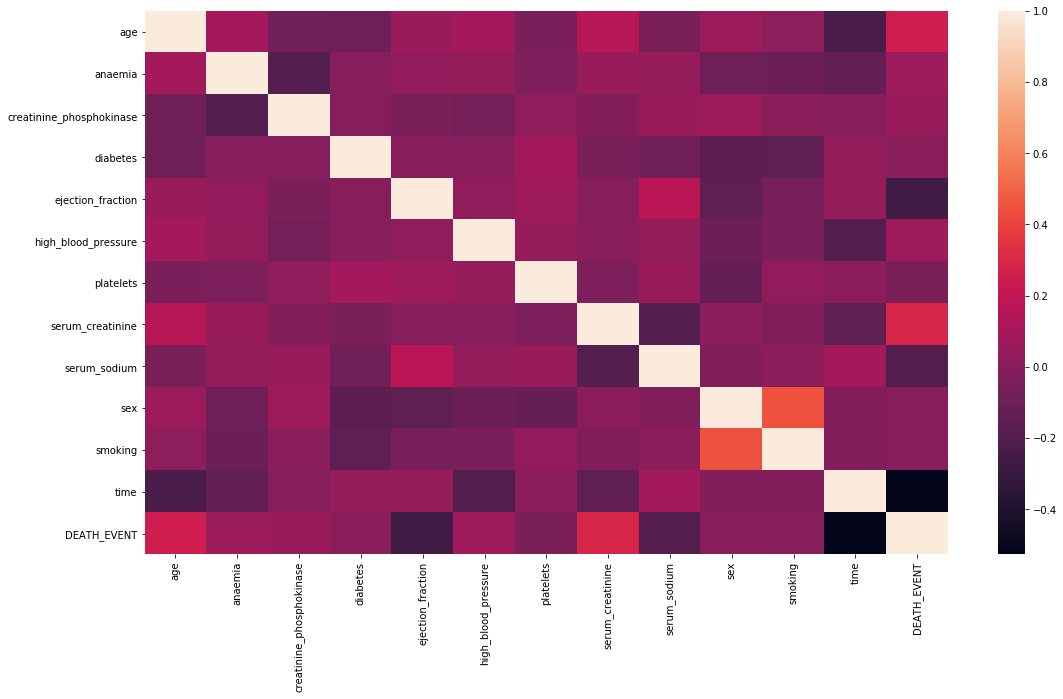

In [7]:

plt.figure(figsize = (18,10))
sns.heatmap(df.corr())



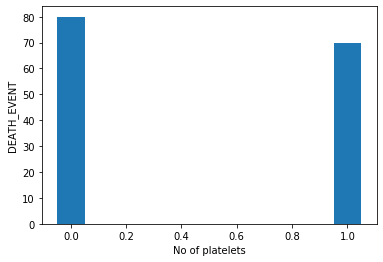

In [8]:
plt.bar(df['DEATH_EVENT'],df['ejection_fraction'],width = 0.1)

plt.xlabel("No of platelets")

plt.ylabel("DEATH_EVENT")


plt.show()

<Figure size 720x576 with 0 Axes>

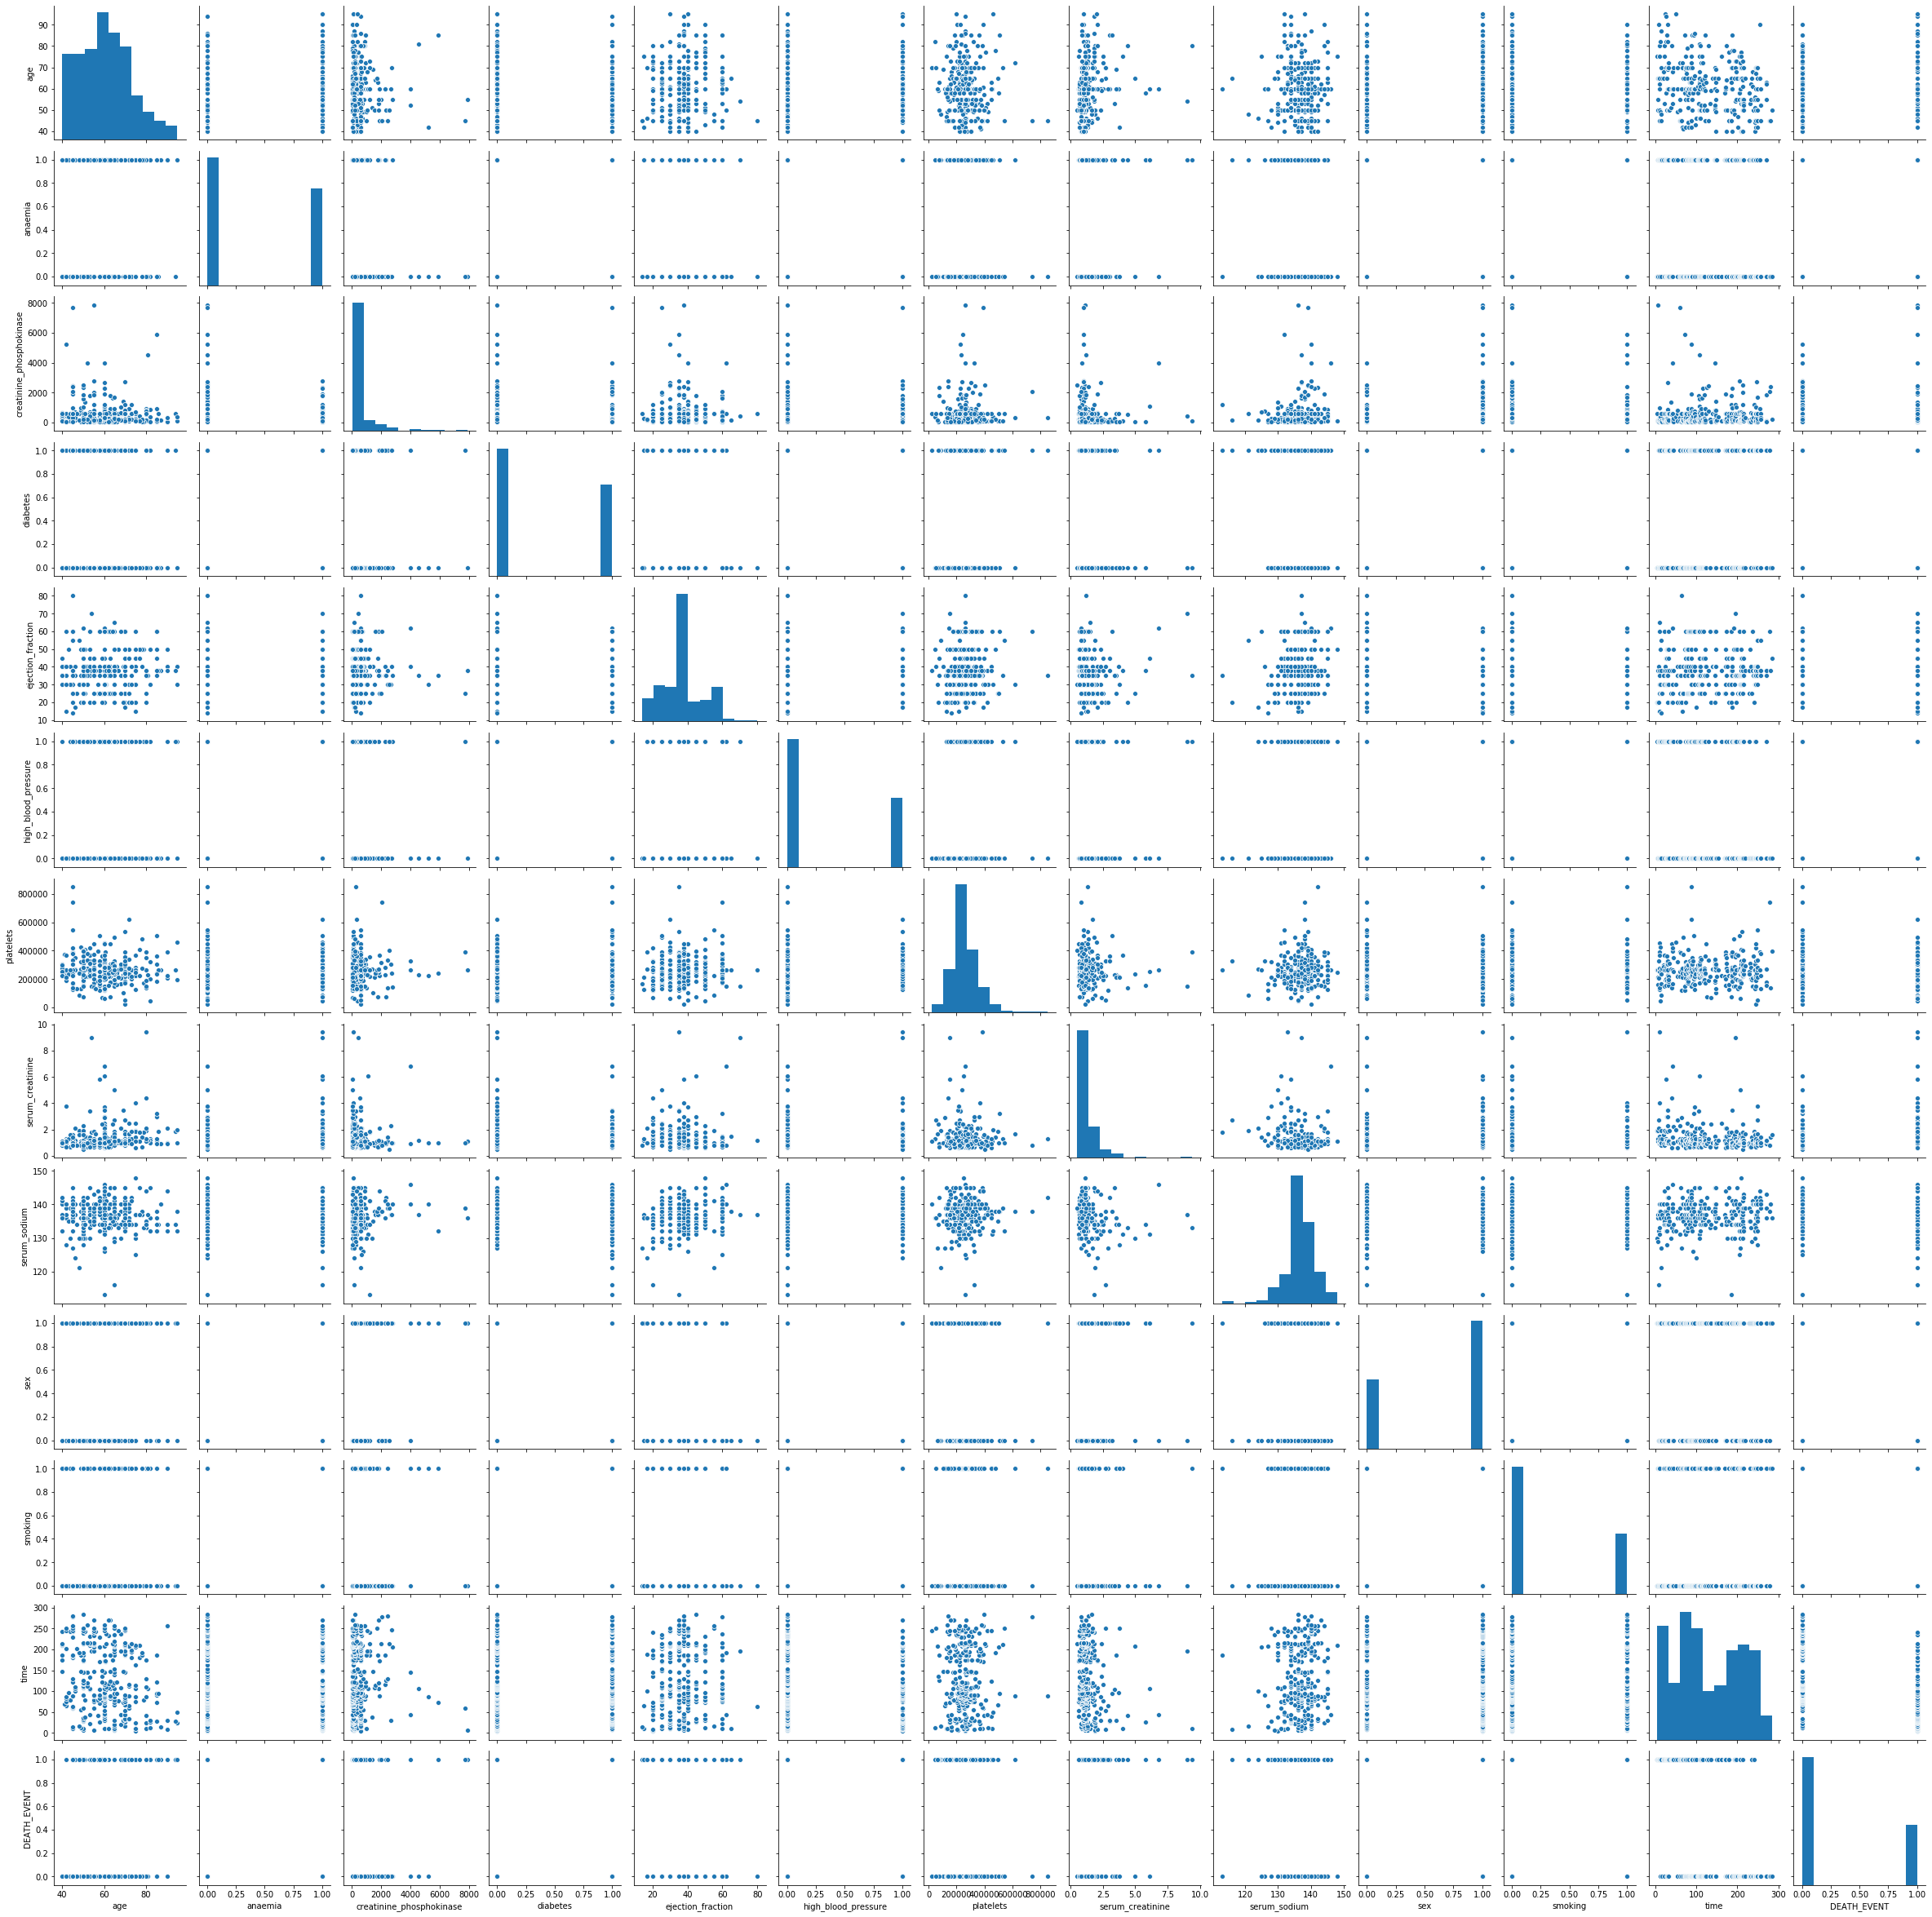

In [9]:

plt.figure(figsize = (10,8))

sns.pairplot(df)



In [10]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
X = df.drop('DEATH_EVENT',axis = 1)

In [12]:
y = df['DEATH_EVENT']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =0)

In [15]:
#from sklearn.preprocessing import MinMaxScaler
#MMS = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)

In [17]:
X_train.shape

(224, 12)

In [18]:
X_test = sc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
RFC = RandomForestClassifier()


In [21]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
RFC_predict = RFC.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,RFC_predict)

0.84

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
 x = confusion_matrix(y_test,RFC_predict)

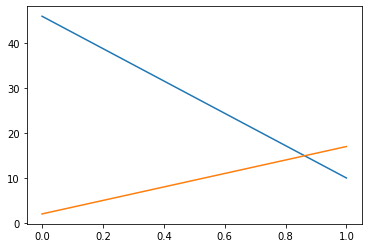

In [27]:
plt.plot(x)

In [28]:
x

array([[46,  2],
       [10, 17]], dtype=int64)

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ADA = AdaBoostClassifier(learning_rate=1.0)

In [31]:
ADA.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [32]:
ADA_predict = ADA.predict(X_test)

In [33]:
confusion_matrix(y_test,ADA_predict)

array([[46,  2],
       [ 9, 18]], dtype=int64)

In [34]:
accuracy_score(y_test,ADA_predict)

0.8533333333333334

In [35]:
import tensorflow

C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import Dense

In [38]:
from tensorflow.keras.layers import LeakyReLU,ReLU

In [39]:
from tensorflow.keras.layers import Dropout

In [59]:
classifier = Sequential()

In [60]:
classifier.add(Dense(units = 8,kernel_initializer = 'he_uniform',activation = 'relu',input_dim  =12 ))

In [61]:
#classifier.add(Dropout(0.2))

In [62]:
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform' ,activation = 'relu'))

In [63]:
#classifier.add(Dropout(0.2))

In [64]:
classifier.add(Dense(units = 1 ,kernel_initializer = 'glorot_uniform' ,activation = 'sigmoid'))

In [65]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [66]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.25,batch_size = 15 , epochs = 100)

Train on 168 samples, validate on 56 samples
Epoch 1/100
168/168 [==============================] - 0s 3ms/sample - loss: 0.8068 - acc: 0.4524 - val_loss: 0.8938 - val_acc: 0.4821
Epoch 2/100
168/168 [==============================] - 0s 291us/sample - loss: 0.7610 - acc: 0.4881 - val_loss: 0.8456 - val_acc: 0.4821
Epoch 3/100
168/168 [==============================] - 0s 220us/sample - loss: 0.7260 - acc: 0.5357 - val_loss: 0.8038 - val_acc: 0.5000
Epoch 4/100
168/168 [==============================] - 0s 261us/sample - loss: 0.6946 - acc: 0.5714 - val_loss: 0.7679 - val_acc: 0.5179
Epoch 5/100
168/168 [==============================] - 0s 252us/sample - loss: 0.6703 - acc: 0.5893 - val_loss: 0.7408 - val_acc: 0.5536
Epoch 6/100
168/168 [==============================] - 0s 291us/sample - loss: 0.6490 - acc: 0.5893 - val_loss: 0.7150 - val_acc: 0.5714
Epoch 7/100
168/168 [==============================] - 0s 279us/sample - loss: 0.6306 - acc: 0.6190 - val_loss: 0.6901 - val_acc: 0.607

168/168 [==============================] - 0s 279us/sample - loss: 0.2966 - acc: 0.9048 - val_loss: 0.4962 - val_acc: 0.8214
Epoch 61/100
168/168 [==============================] - 0s 267us/sample - loss: 0.2938 - acc: 0.8988 - val_loss: 0.4961 - val_acc: 0.8214
Epoch 62/100
168/168 [==============================] - 0s 208us/sample - loss: 0.2913 - acc: 0.8988 - val_loss: 0.4978 - val_acc: 0.8393
Epoch 63/100
168/168 [==============================] - 0s 184us/sample - loss: 0.2884 - acc: 0.8988 - val_loss: 0.4990 - val_acc: 0.8393
Epoch 64/100
168/168 [==============================] - 0s 190us/sample - loss: 0.2861 - acc: 0.9048 - val_loss: 0.5014 - val_acc: 0.8393
Epoch 65/100
168/168 [==============================] - 0s 196us/sample - loss: 0.2835 - acc: 0.8988 - val_loss: 0.5012 - val_acc: 0.8393
Epoch 66/100
168/168 [==============================] - 0s 202us/sample - loss: 0.2813 - acc: 0.8988 - val_loss: 0.5016 - val_acc: 0.8393
Epoch 67/100
168/168 [=========================